# Exploring Healthcare Billing Trends: A Focus on Emergency Admissions and Diabetes
By, Jeannie Halvorson

## Project Overview
In this analysis, we explore healthcare billing patterns with a focus on emergency admissions and their associated costs. Using a synthetic healthcare dataset, we aim to uncover trends and actionable insights that can help healthcare providers optimize resource allocation and improve patient care.

## Objectives
- Analyze the relationship between admission types and billing amounts.
- Investigate how specific medical conditions, particularly diabetes, impact billing.
- Provide visualizations and statistical summaries to highlight key trends.

## Dataset Overview
The dataset consists of anonymized healthcare data with the following key features:
- **Patient Demographics**: Age, Gender, Blood Type.
- **Healthcare Details**: Admission Type, Medical Condition, Hospital, Doctor.
- **Billing and Outcomes**: Billing Amount, Insurance Provider, Test Results.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_theme(style="whitegrid")

# Load the dataset
file_path = 'healthcare_dataset.csv'  
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Data Cleaning and Preprocessing
1. Handle missing values: Identify and manage missing or inconsistent data.
2. Ensure data types are appropriate (e.g., dates, numerical columns).
3. Remove duplicates if necessary.


In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop duplicates if present
data = data.drop_duplicates()

# Convert 'Date of Admission' and 'Discharge Date' to datetime
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Create a 'Length of Stay' column
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days


Missing Values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


## Exploratory Data Analysis
Here, we explore the dataset to understand the distribution of key variables and identify patterns in healthcare billing.


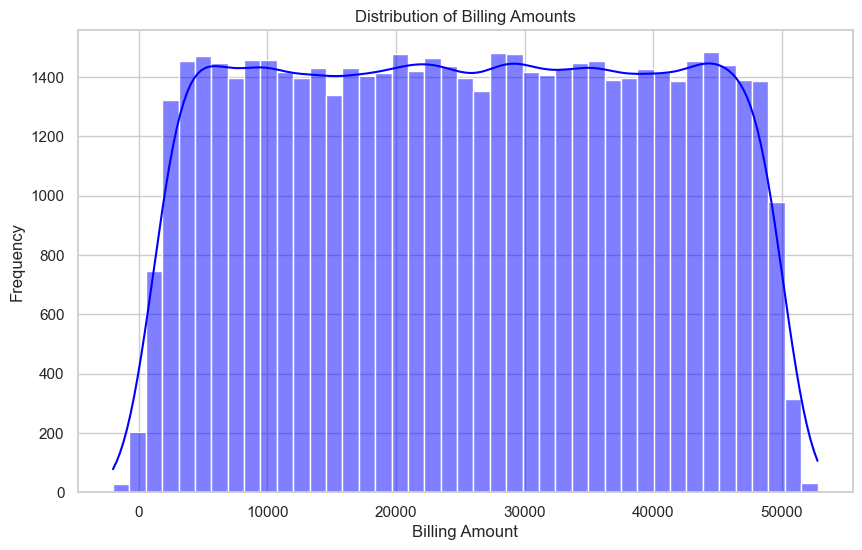

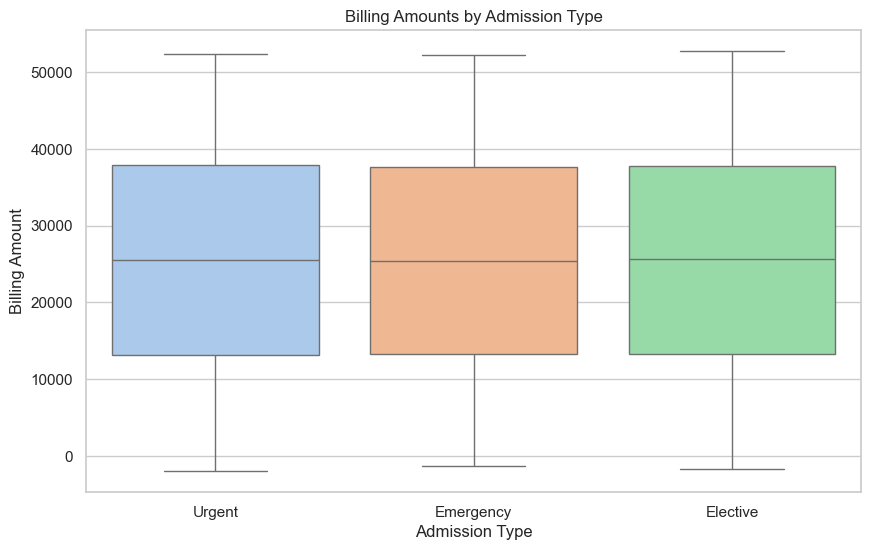

In [13]:
# Distribution of billing amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Billing Amount'], kde=True, color='blue')
plt.title('Distribution of Billing Amounts')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Billing by admission type
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Admission Type',
    y='Billing Amount',
    data=data,
    hue='Admission Type',  
    palette='pastel',
    legend=False  
)
plt.title('Billing Amounts by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()


### Emergency Admissions and Diabetes
We delve deeper into emergency admissions, examining how the presence of diabetes as a medical condition influences billing patterns.


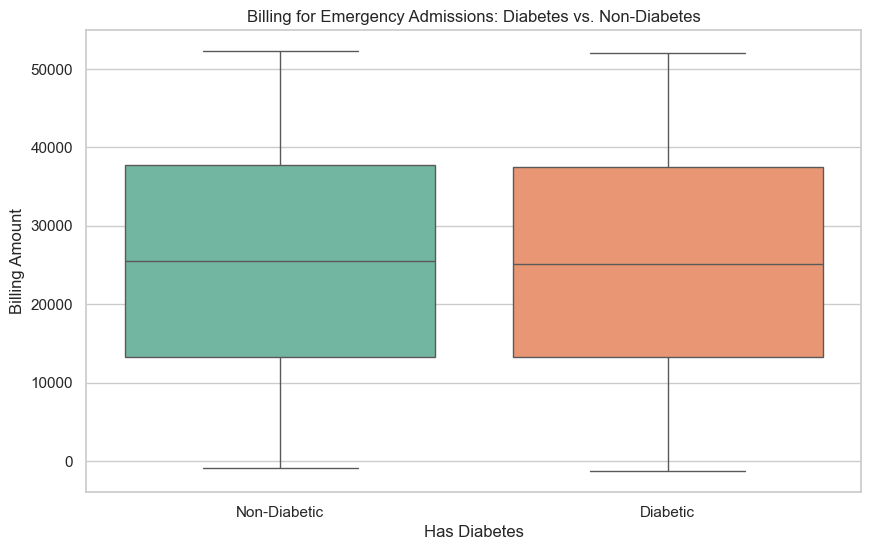

In [14]:
# Filter data for emergency admissions
emergency_data = data[data['Admission Type'] == 'Emergency']

# Compare billing for diabetic vs non-diabetic patients
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=emergency_data['Medical Condition'] == 'Diabetes',
    y=emergency_data['Billing Amount'],
    hue=emergency_data['Medical Condition'] == 'Diabetes',  
    palette='Set2',
    legend=False  
)
plt.title('Billing for Emergency Admissions: Diabetes vs. Non-Diabetes')
plt.xlabel('Has Diabetes')
plt.ylabel('Billing Amount')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()


## Statistical Summary
To reinforce our findings, we calculate the mean and median billing amounts for emergency admissions, stratified by diabetes diagnosis.


In [15]:
# Mean and median billing for emergency admissions
billing_summary = emergency_data.groupby(emergency_data['Medical Condition'] == 'Diabetes')['Billing Amount'].agg(['mean', 'median']).reset_index()
billing_summary.columns = ['Has Diabetes', 'Mean Billing', 'Median Billing']
print(billing_summary)


   Has Diabetes  Mean Billing  Median Billing
0         False  25511.999008    25461.702418
1          True  25471.610170    25108.193687


### **Conclusion**

#### **Key Findings**
1. Emergency admissions still show high billing amounts across all conditions.  
2. Contrary to initial expectations, diabetic patients have similar mean and median billing amounts compared to non-diabetic patients. While there is a small difference, it is not substantial enough to suggest a clear trend.  

#### **Implications**
These findings suggest that while diabetes is a significant health condition, it does not necessarily lead to higher billing amounts during emergency admissions in this dataset. This may indicate effective management of diabetic emergencies or other factors that influence healthcare costs, such as treatment protocols or insurance coverage.

#### **Next Steps**
- Investigate other medical conditions or combinations of conditions that might significantly influence billing.  
- Explore additional variables like length of stay or test results to identify cost drivers.  
- Conduct hypothesis testing to determine if the observed differences in billing are statistically significant.
